In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target

In [6]:
AGE = 0; SEX = 1; MASS_INDEX =2; BLOOD_PRESSURE = 3; SUGAR_LEVEL = 9
print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
print(x.shape)

(442, 10)


It means our data set has 442 samples (rows) and 10 features (columns)

In [8]:
print(y.shape)
type(y)

(442,)


numpy.ndarray

The shape of our variables are the same with the sample rows and also the target variable is type numerical and the length is 442 rows.

In [9]:
x[:5,:]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

we printed the first 5 rows of data

In [10]:
y[0:5]

array([151.,  75., 141., 206., 135.])

we printed the five rows that belong to our target

In [11]:
x[0,MASS_INDEX]

0.061696206518683294

print the feature MAX_INDEX, first row

In [12]:
x[1:3,AGE]

array([-0.00188202,  0.08529891])

We printed the normalized age from the data in rows 1 and 2, this data was previously normalized.
Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).



In [13]:
diabetes.data.shape[0]

442

In [14]:
t = range(0,diabetes.data.shape[0],1) # same as x =range(0,len(y),1)

Let's plot some features

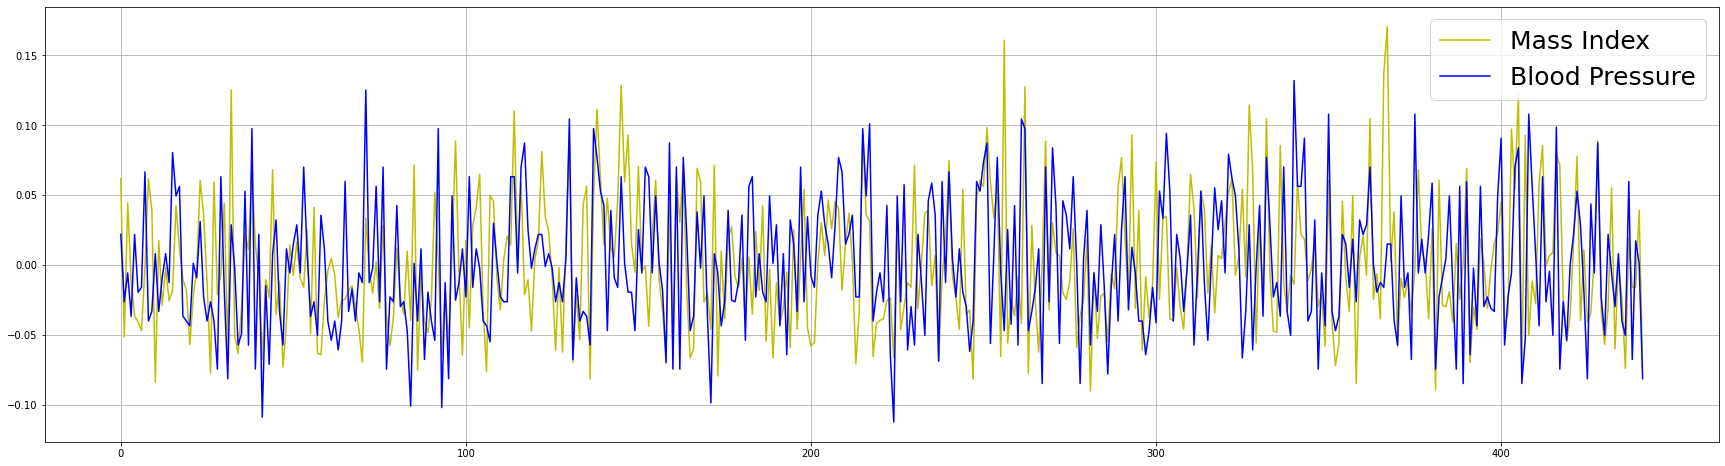

In [15]:
plt.figure(figsize=(30,8))
plt.plot(t,x[:,MASS_INDEX],'y-', label = 'Mass Index')
plt.plot(t,x[:,BLOOD_PRESSURE], 'b-', label = 'Blood Pressure')
plt.rcParams.update({'font.size':22});
plt.legend(prop = {'size':25});plt.grid();
plt.show()

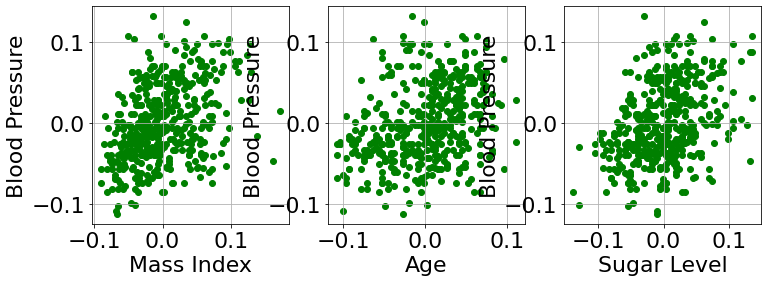

In [16]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
for fig, feature, label in zip (range(3),[MASS_INDEX,AGE,SUGAR_LEVEL],
                                ['Mass Index', 'Age','Sugar Level']):
  axs[fig].scatter(x[:,feature],x[:,BLOOD_PRESSURE],c='g',marker = 'o')
  axs[fig].set_xlabel(label); axs[fig].set_ylabel('Blood Pressure')
  axs[fig].grid();
plt.show()

# **REGRESSION DATASET DIABETES**
For this regression we only use one feature which is MASS_INDEX

In [42]:
#inserts a new dimension and selects third column
y= diabetes.target
X = diabetes.data[:,np.newaxis,MASS_INDEX]
print(diabetes.data.shape)
print(diabetes.data[:,MASS_INDEX].shape)
print(diabetes.data[:,np.newaxis,MASS_INDEX].shape) 

(442, 10)
(442,)
(442, 1)


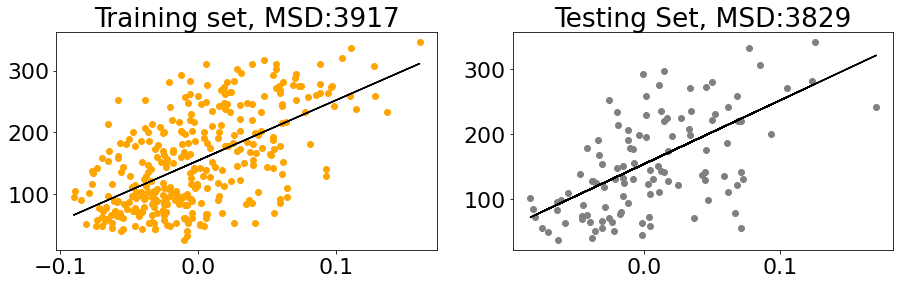

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

#obtains an instance of LinearRegression
linear_regression = linear_model.LinearRegression()
#Cretas the model using the training data
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)  #train predictions
y_test_predicted =  linear_regression.predict(X_test) #test predictions

#quality obtained in the trainig set
train_MSD = mean_squared_error (y_train, y_train_predicted)

#quality obtained in the testing set
test_MSD = mean_squared_error(y_test, y_test_predicted)

#Draw training and testing results 
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].scatter(X_train, y_train, color='orange')
axs[0].plot(X_train, y_train_predicted, color ='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test, color ='gray')
axs[1].plot(X_test, y_test_predicted, color ='black')
axs[1].set_title('Testing Set, MSD:{:.0f}'.format(test_MSD))

plt.show()